<a href="https://colab.research.google.com/github/Dicti93/MLSEM/blob/master/Marcel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
# pip install ucimlrepo

In [238]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn imports for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVC

# tensorflow for nn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Specific library import for fetching datasets
from ucimlrepo import fetch_ucirepo

In [239]:
# fetch dataset
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

# data (as pandas dataframes)
features = regensburg_pediatric_appendicitis.data.features
targets = regensburg_pediatric_appendicitis.data.targets

# metadata
print(regensburg_pediatric_appendicitis.metadata)

# variable information
print(regensburg_pediatric_appendicitis.variables)

{'uci_id': 938, 'name': 'Regensburg Pediatric Appendicitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis', 'data_url': 'https://archive.ics.uci.edu/static/public/938/data.csv', 'abstract': 'This repository holds the data from a cohort of pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021. Each patient has (potentially multiple) ultrasound (US) images, aka views, tabular data comprising laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and three target variables, namely, diagnosis, management and severity.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Image'], 'num_instances': 782, 'num_features': 53, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Sex'], 'target_col': ['Management', 'Severity',

In [240]:
# Print the basic info of the features DataFrame
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

In [241]:
# Print the basic info of the targets DataFrame
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Management  781 non-null    object
 1   Severity    781 non-null    object
 2   Diagnosis   780 non-null    object
dtypes: object(3)
memory usage: 18.5+ KB


In [242]:
# Display the first 5 rows of the features DataFrame
print(features.head())

     Age   BMI     Sex  Height  Weight  Length_of_Stay  Alvarado_Score  \
0  12.68  16.9  female   148.0    37.0             3.0             4.0   
1  14.10  31.9    male   147.0    69.5             2.0             5.0   
2  14.14  23.3  female   163.0    62.0             4.0             5.0   
3  16.37  20.6  female   165.0    56.0             3.0             7.0   
4  11.08  16.9  female   163.0    45.0             3.0             5.0   

   Paedriatic_Appendicitis_Score Appendix_on_US  Appendix_Diameter  ...  \
0                            3.0            yes                7.1  ...   
1                            4.0             no                NaN  ...   
2                            3.0             no                NaN  ...   
3                            6.0             no                NaN  ...   
4                            6.0            yes                7.0  ...   

  Abscess_Location Pathological_Lymph_Nodes Lymph_Nodes_Location  \
0              NaN                  

In [243]:
# Display the first 5 rows of the targets DataFrame
print(targets.head())

     Management       Severity        Diagnosis
0  conservative  uncomplicated     appendicitis
1  conservative  uncomplicated  no appendicitis
2  conservative  uncomplicated  no appendicitis
3  conservative  uncomplicated  no appendicitis
4  conservative  uncomplicated     appendicitis


In [244]:
# Print all feature names
print(features.columns)

Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay',
       'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_on_US',
       'Appendix_Diameter', 'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count',
       'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Neutrophilia',
       'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count',
       'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'CRP', 'Dysuria',
       'Stool', 'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness',
       'US_Performed', 'Free_Fluids', 'Appendix_Wall_Layers', 'Target_Sign',
       'Appendicolith', 'Perfusion', 'Perforation',
       'Surrounding_Tissue_Reaction', 'Appendicular_Abscess',
       'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location',
       'Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Ileus',
       'Coprostasis', 'Me

In [245]:
# Print all target names
print(targets.columns)

Index(['Management', 'Severity', 'Diagnosis'], dtype='object')


In [246]:
# Print unique values for each feature column
for col in features.columns:
    print(f"{col} has {features[col].nunique()} unique values")

Age has 577 unique values
BMI has 510 unique values
Sex has 2 unique values
Height has 187 unique values
Weight has 268 unique values
Length_of_Stay has 19 unique values
Alvarado_Score has 11 unique values
Paedriatic_Appendicitis_Score has 11 unique values
Appendix_on_US has 2 unique values
Appendix_Diameter has 78 unique values
Migratory_Pain has 2 unique values
Lower_Right_Abd_Pain has 2 unique values
Contralateral_Rebound_Tenderness has 2 unique values
Coughing_Pain has 2 unique values
Nausea has 2 unique values
Loss_of_Appetite has 2 unique values
Body_Temperature has 46 unique values
WBC_Count has 210 unique values
Neutrophil_Percentage has 355 unique values
Segmented_Neutrophils has 39 unique values
Neutrophilia has 2 unique values
RBC_Count has 171 unique values
Hemoglobin has 65 unique values
RDW has 53 unique values
Thrombocyte_Count has 260 unique values
Ketones_in_Urine has 4 unique values
RBC_in_Urine has 4 unique values
WBC_in_Urine has 4 unique values
CRP has 146 unique v

In [247]:
# For targets, especially if they are categorical
for col in targets.columns:
    print(f"{col} has {targets[col].nunique()} unique values")

Management has 4 unique values
Severity has 2 unique values
Diagnosis has 2 unique values


FEATURE ENGINEERING

In [248]:
# Results storage for confusion matrices and ROC curves
confusion_matrices = []
roc_curves = []

In [249]:
diagnosis = targets[['Diagnosis']].copy()

# Initialize the label encoder to convert 'Diagnosis' to a numeric format
label_encoder = LabelEncoder()

# Encode the 'Diagnosis' column
diagnosis['Diagnosis_encoded'] = label_encoder.fit_transform(diagnosis['Diagnosis'].astype(str))

# Find indexes of rows where 'Diagnosis' is NaN
nan_indexes = diagnosis['Diagnosis'].isna()

# Remove these rows from both 'diagnosis' and 'features'
# Explicitly create a copy to avoid SettingWithCopyWarning when modifying this DataFrame later
diagnosis_cleaned = diagnosis.dropna(subset=['Diagnosis']).copy()
features_cleaned = features.loc[diagnosis_cleaned.index].copy()

# Encode the 'Diagnosis' column and add it as a new column to the DataFrame
diagnosis_cleaned['Diagnosis_encoded'] = label_encoder.fit_transform(diagnosis_cleaned['Diagnosis'])

# Check the transformation and print unique encoded values
print(diagnosis_cleaned[['Diagnosis', 'Diagnosis_encoded']].head())
print(set(diagnosis_cleaned['Diagnosis_encoded']))

         Diagnosis  Diagnosis_encoded
0     appendicitis                  0
1  no appendicitis                  1
2  no appendicitis                  1
3  no appendicitis                  1
4     appendicitis                  0
{0, 1}


In [250]:
# Convert categorical variable into dummy/indicator variables (one-hot encoding)
X = pd.get_dummies(features_cleaned)

# Store feature names after one-hot encoding, as they will be needed for interpreting the model's feature importances
feature_names = X.columns.tolist()

# Assign the encoded diagnosis column to y, which serves as the target variable for the model
y = diagnosis_cleaned['Diagnosis_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ensure the same set of columns in both train and test sets
# - 'join=left' ensures all columns in X_train are kept, aligning X_test to it
# - 'axis=1' specifies that the alignment is to be done on columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

IMPUTER

In [251]:
# Create an imputer object that replaces NaN values with the median of the column
imputer = SimpleImputer(strategy='median')

# Standardize the data
scaler = StandardScaler()

RANDOM FOREST

In [252]:
# Create a RandomForestClassifier with a specified number of estimators and a fixed random state for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline that first imputes missing values then trains a model
pipeline = Pipeline(steps=[('imputer', imputer), ('scaler', scaler), ('classifier', rf_model)])


# Fit the model using the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = pipeline.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
confusion_matrices.append(cm_rf)

fpr_rf, tpr_rf, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_curves.append((fpr_rf, tpr_rf))

# Print the accuracy and a classification report to see performance details
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9188034188034188
Confusion Matrix:
 [[129   7]
 [ 12  86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       136
           1       0.92      0.88      0.90        98

    accuracy                           0.92       234
   macro avg       0.92      0.91      0.92       234
weighted avg       0.92      0.92      0.92       234



FEATURE IMPORTANCE

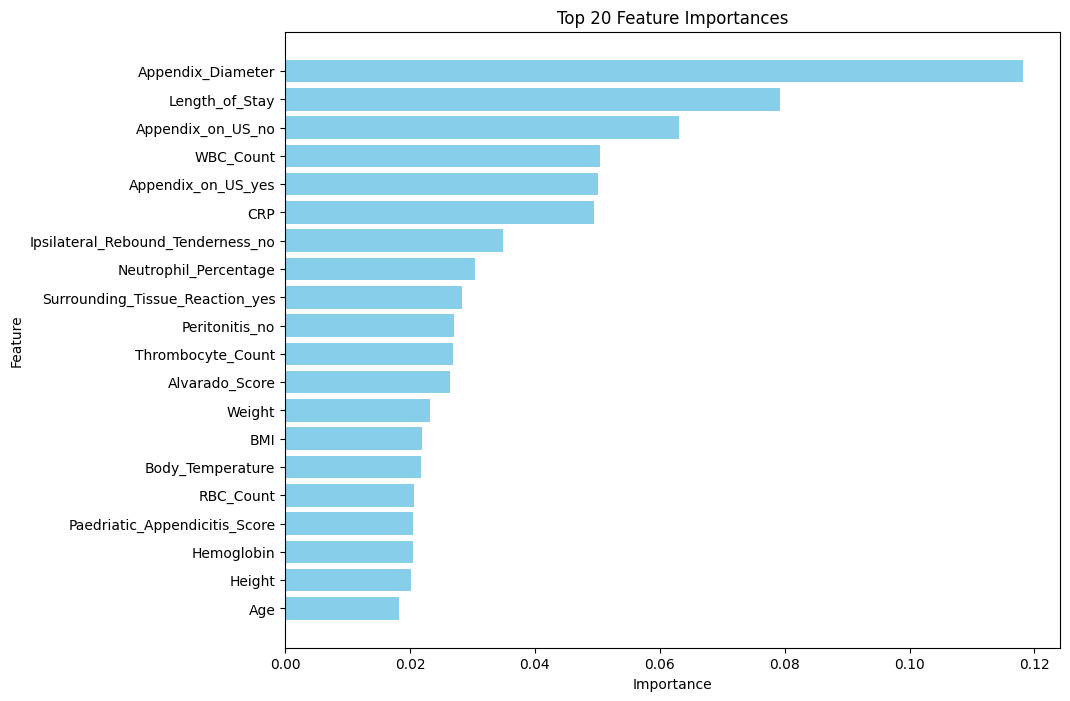

In [253]:
# Get feature importances
importances = rf_model.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color='skyblue')  # top 20 features
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # highest importance at the top
plt.show()


LOGISTIC REGRESSION

In [254]:
# Create a pipeline that first imputes missing values then trains a model
pipeline = Pipeline(steps=[('imputer', imputer), ('scaler', scaler), ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = pipeline.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
confusion_matrices.append(cm_lr)

fpr_lr, tpr_lr, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_curves.append((fpr_lr, tpr_lr))

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy: 0.8547008547008547
Confusion Matrix:
 [[116  20]
 [ 14  84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       136
           1       0.81      0.86      0.83        98

    accuracy                           0.85       234
   macro avg       0.85      0.86      0.85       234
weighted avg       0.86      0.85      0.86       234



Gradient Boosting Classifier

In [255]:
learning_rates = [0.05, 0.1, 0.2, 0.3]

results = []
for rate in learning_rates:
    # Set up the Gradient Boosting Classifier with current learning rate
    gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=rate, random_state=42)

    # Create and fit the pipeline
    gb_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('classifier', gb_model)
    ])
    gb_pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred_gb = gb_pipeline.predict(X_test)

    # Gather results
    accuracy = accuracy_score(y_test, y_pred_gb)
    conf_matrix = confusion_matrix(y_test, y_pred_gb)
    cls_report = classification_report(y_test, y_pred_gb)

    # Store results in a dictionary
    results.append({
        'learning_rate': rate,
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': cls_report
    })

    # Optionally print results for each model
    print(f"Learning Rate: {rate}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{cls_report}\n")

Learning Rate: 0.05
Accuracy: 0.9188034188034188
Confusion Matrix:
[[130   6]
 [ 13  85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       136
           1       0.93      0.87      0.90        98

    accuracy                           0.92       234
   macro avg       0.92      0.91      0.92       234
weighted avg       0.92      0.92      0.92       234


Learning Rate: 0.1
Accuracy: 0.9316239316239316
Confusion Matrix:
[[130   6]
 [ 10  88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       136
           1       0.94      0.90      0.92        98

    accuracy                           0.93       234
   macro avg       0.93      0.93      0.93       234
weighted avg       0.93      0.93      0.93       234


Learning Rate: 0.2
Accuracy: 0.9401709401709402
Confusion Matrix:
[[129   7]
 [  7  91]]
Classification Report:
       

In [256]:
learning_rate_to_plot = 0.1  # Choose the learning rate for visualization
for result in results:
    if result['learning_rate'] == learning_rate_to_plot:
        cm_gb = result['confusion_matrix']
        confusion_matrices.append(cm_gb)

        fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_pipeline.predict_proba(X_test)[:, 1])
        roc_curves.append((fpr_gb, tpr_gb))

Support Vector Machine

In [257]:
# SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# Create a pipeline that includes scaling, imputation, and the SVM classifier
svm_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),  # SVMs require feature scaling for optimal performance
    ('classifier', svm_model)
])

# Fit the SVM model
svm_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_pipeline.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
confusion_matrices.append(cm_svm)

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_pipeline.decision_function(X_test))
roc_curves.append((fpr_svm, tpr_svm))

# Print the accuracy and a classification report to see performance details
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))

Accuracy (SVM): 0.8547008547008547
Confusion Matrix (SVM):
 [[114  22]
 [ 12  86]]
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       136
           1       0.80      0.88      0.83        98

    accuracy                           0.85       234
   macro avg       0.85      0.86      0.85       234
weighted avg       0.86      0.85      0.86       234



Neural Network

In [258]:
# Create a pipeline for preprocessing
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Apply transformations and prepare data
X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.transform(X_test)

# Build a simple neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_prepared.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the neural network
history = model.fit(X_train_prepared, y_train, epochs=50, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_prepared, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50
16/16 [==============================] - 1s 18ms/step - loss: 0.6169 - accuracy: 0.6415 - val_loss: 0.5027 - val_accuracy: 0.7455
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.3798 - accuracy: 0.8269 - val_loss: 0.4338 - val_accuracy: 0.7818
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.2776 - accuracy: 0.8900 - val_loss: 0.3644 - val_accuracy: 0.8182
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 0.2080 - accuracy: 0.9369 - val_loss: 0.3192 - val_accuracy: 0.8364
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 0.1573 - accuracy: 0.9552 - val_loss: 0.2934 - val_accuracy: 0.8364
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.1179 - accuracy: 0.9796 - val_loss: 0.2697 - val_accuracy: 0.8364
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0915 - accuracy: 0.9878 - val_loss: 0.2631 - val_accuracy: 0.8364
Epoch 8/50
16/16 [=

In [259]:
# Retrieve the confusion matrix and ROC curve from the neural network's predictions
y_pred_nn = (model.predict(X_test_prepared) > 0.5).astype("int32")
cm_nn = confusion_matrix(y_test, y_pred_nn)
confusion_matrices.append(cm_nn)

fpr_nn, tpr_nn, _ = roc_curve(y_test, model.predict(X_test_prepared))
roc_curves.append((fpr_nn, tpr_nn))

8/8 [==============================] - 0s 2ms/step


VISUALISE

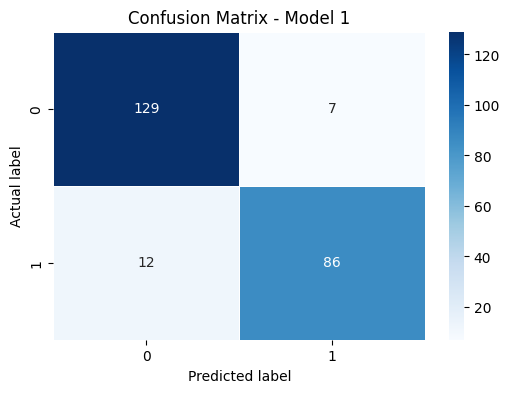

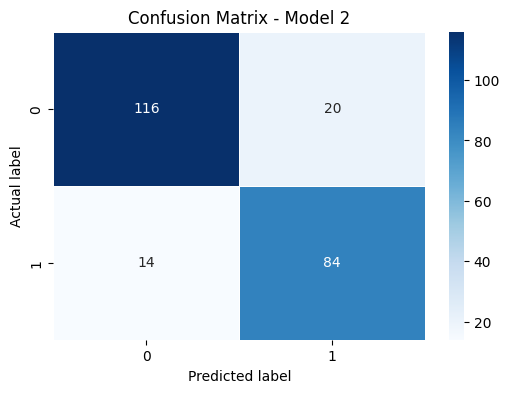

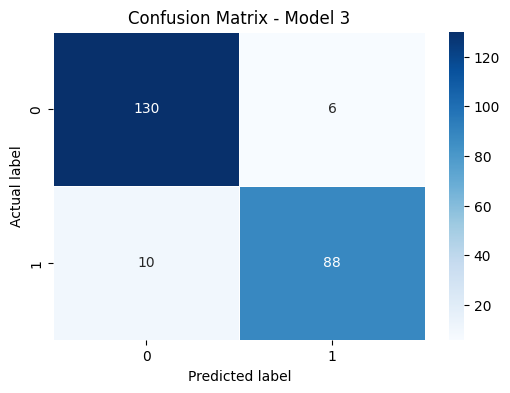

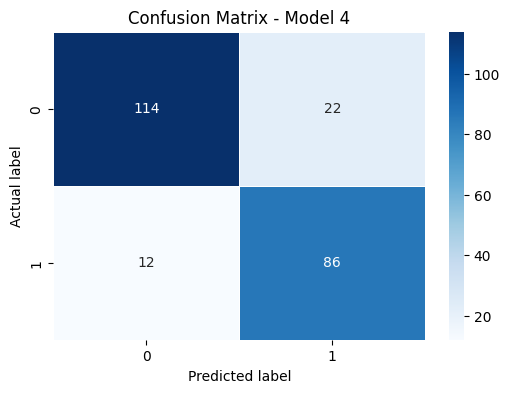

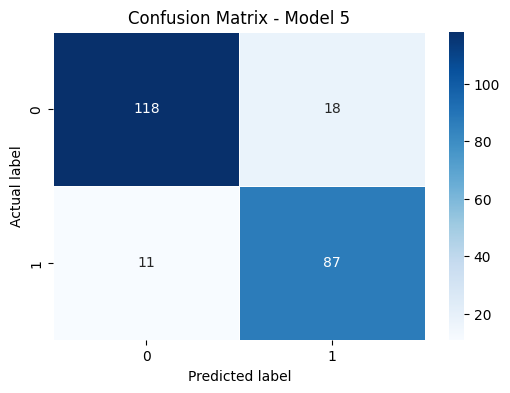

In [260]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap="Blues")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.show()

# Plot confusion matrices
for idx, cm in enumerate(confusion_matrices):
    plot_confusion_matrix(cm, f'Confusion Matrix - Model {idx+1}')

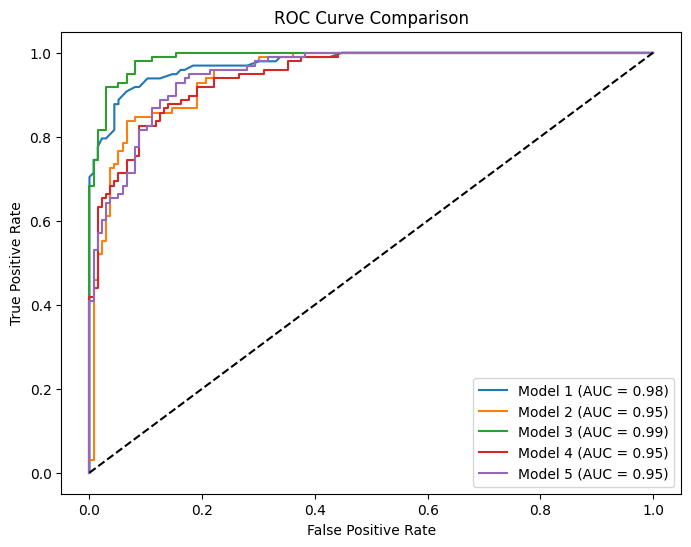

In [261]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
for idx, curve in enumerate(roc_curves):
    fpr, tpr = curve
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Model {idx+1} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

<ipython-input-262-3e4d87724afa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracies, palette='deep')


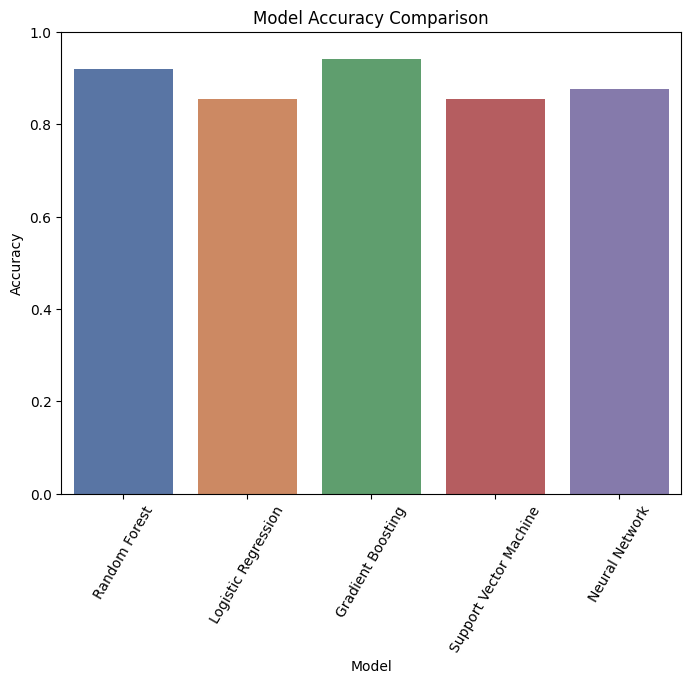

In [262]:
# Plot accuracies in a bar chart for comparison
labels = ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'Support Vector Machine', 'Neural Network']

# Collect accuracies for each model
accuracies = [accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_lr),
              accuracy_score(y_test, y_pred_gb),
              accuracy_score(y_test, y_pred_svm),
              accuracy_score(y_test, y_pred_nn)]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=accuracies, palette='deep')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limits to show percentages from 0 to 100%
plt.xticks(rotation=60) # Rotate x-axis labels
plt.show()
